1 GMO
This section is not graded, and you do not need to submit your answers. But you are expected to consider these issues and be ready to discuss them.
1. GMO’s approach.
(a) Why does GMO believe they can more easily predict long-run than short-run asset class performance?
(b) What predicting variables does the case mention are used by GMO? Does this fit with the goal of long-run forecasts?
(c) How has this approach led to contrarian positions?
(d) How does this approach raise business risk and managerial career risk?
2. The market environment.
(a) We often estimate the market risk premium by looking at a large sample of historic data. What reasons does the case give to be skeptical that the market risk premium will be as high in the future as it has been over the past 50 years?
(b) In 2007, GMO forecasts real excess equity returns will be negative. What are the biggest drivers of their pessimistic conditional forecast relative to the unconditional forecast. (See Exhibit 9.)
(c) In the 2011 forecast, what components has GMO revised most relative to 2007? Now how does their conditional forecast compare to the unconditional? (See Exhibit 10.)
3. Consider the asset class forecasts in Exhibit 1.
(a) Which asset class did GMO estimate to have a negative 10-year return over 2002-2011? (b) Which asset classes substantially outperformed GMO’s estimate over that time period?
(c) Which asset classes substantially underperformed GMO’s estimate over that time period? 4. Fund Performance.
(a) In which asset class was GMWAX most heavily allocated throughout the majority of 1997- 2011?
(b) Comment on the performance of GMWAX versus its benchmark. (No calculation needed; simply comment on the comparison in the exhibits.)

<span style="color:blue">
1. 
- a). GMO believes they can more easily predict long-run asset class performance than short-run performance because they think that the expected return on stocks over the intermediate term can differ from the long-run return that investors require. This aligns with the famous saying: ‘In the short run, the market is a voting machine, but in the long run, it is a weighing machine. Basically, this means that short-term stock prices can inflate or deflate based on popularity, but long term, they will hold their true value.
- b). Predicting variables: Change in P/E ratio, Change in profit margin, Change in Growth Sales/Share. The goal of these indicators is to show the "true" weight of a stock rather than the current price being adjusted by popularity. P/E and profit margins would tend to revert to long-term steady-state levels.
- c). In order to properly allocate, if they noticed an asset class they were pessimistic about, they would slightly trim it. So this contrarian approach helped reduce portfolio risk over time.
- d). This approach raised business risk by generating below-average returns for certain time periods.
</span>

2. The market environment.
(a) We often estimate the market risk premium by looking at a large sample of historic data. What reasons does the case give to be skeptical that the market risk premium will be as high in the future as it has been over the past 50 years?
(b) In 2007, GMO forecasts real excess equity returns will be negative. What are the biggest drivers of their pessimistic conditional forecast relative to the unconditional forecast. (See Exhibit 9.)
(c) In the 2011 forecast, what components has GMO revised most relative to 2007? Now how does their conditional forecast compare to the unconditional? (See Exhibit 10.)

<span style="color:blue">
2. -a). After 2008, the S&P500 was still trading above its PE average of 16 at 19.9, now GMO was pessimistic about how muc h more it could grow in the future. b). The biggest drivers of pessimistic conditional forecasts was a high P/E ratio and high profit margins compared to level in 7 years. c). They revised the PE Ratio, decreased the steady state level assumptions. <span>

3. Consider the asset class forecasts in Exhibit 1.
(a) Which asset class did GMO estimate to have a negative 10-year return over 2002-2011? (b) Which asset classes substantially outperformed GMO’s estimate over that time period?
(c) Which asset classes substantially underperformed GMO’s estimate over that time period?m

<span style="color:blue">
3. a). US Equities. b). Foriegn Government Bonds. C). US REITS/US Tbills
<span>


4. Fund Performance.
(a) In which asset class was GMWAX most heavily allocated throughout the majority of 1997- 2011?
(b) Comment on the performance of GMWAX versus its benchmark. (No calculation needed; simply comment on the comparison in the exhibits.)

<span style="color:blue">
4. a). US Fixed Income. b). US Fixed Income, Per Exhibit 1, The SP market had lower returns than FI
<span>

In [25]:
from random import sample

import pandas as pd
from openpyxl.styles.builtins import total
from sympy.physics.control.control_plots import matplotlib

from portfolio_management_helper.portfolio_management_helper.helper_functions import *
import portfolio_management_helper.portfolio_management_helper.helper_functions as pmh
from portfolio_management_helper.capm_helper.regression import *
import portfolio_management_helper.capm_helper.regression as cmh
import matplotlib.pyplot as plt

In [81]:
def OOS_r2(df, factors, start):
    y = df['SPY']
    X = sm.add_constant(factors)

    forecast_err, null_err = [], []

    for i,j in enumerate(df.index):
        if i >= start:
            currX = X.iloc[:i]
            currY = y.iloc[:i]
            reg = sm.OLS(currY, currX, missing = 'drop').fit()
            null_forecast = currY.mean()
            reg_predict = reg.predict(X.iloc[[i]])
            actual = y.iloc[[i]]
            forecast_err.append(reg_predict - actual)
            null_err.append(null_forecast - actual)
            
    RSS = (np.array(forecast_err)**2).sum()
    TSS = (np.array(null_err)**2).sum()
    
    return ((1 - RSS/TSS),reg)

In [26]:
def OOS_r2(df, factors, start):
    y = df['SPY']
    X = sm.add_constant(factors)

    forecast_err, null_err = [], []

    for i,j in enumerate(df.index):
        if i >= start:
            currX = X.iloc[:i]
            currY = y.iloc[:i]
            reg = sm.OLS(currY, currX, missing = 'drop').fit()
            null_forecast = currY.mean()
            reg_predict = reg.predict(X.iloc[[i]])
            actual = y.iloc[[i]]
            forecast_err.append(reg_predict - actual)
            null_err.append(null_forecast - actual)
            
    RSS = (np.array(forecast_err)**2).sum()
    TSS = (np.array(null_err)**2).sum()
    
    return ((1 - RSS/TSS),reg)


def OOS_strat(df, factors, start, weight):
    returns = []
    y = df['SPY']
    X = sm.add_constant(factors)

    for i,j in enumerate(df.index):
        if i >= start:
            currX = X.iloc[:i]
            currY = y.iloc[:i]
            reg = sm.OLS(currY, currX, missing = 'drop').fit()
            pred = reg.predict(X.iloc[[i]])
            w = pred * weight
            returns.append((df.iloc[i]['SPY'] * w)[0])

    df_strat = pd.DataFrame(data = returns, index = df.iloc[-(len(returns)):].index, columns = ['Strat Returns'])
    return df_strat

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_cumulative_returns(*dataframes, return_stats=False):
    """
    Plots cumulative returns for multiple dataframes.
    Optionally returns statistics for each DataFrame.

    Parameters:
    *dataframes: Variable number of pandas DataFrames where each DataFrame can have multiple columns of returns.
    return_stats (bool): If True, returns statistical metrics (Mean, Volatility, Sharpe, Minimum, Maximum, VaR(5%)).

    Returns:
    A matplotlib plot with cumulative returns and a legend.
    Optionally returns a dictionary of statistics if return_stats is True.
    """
    stats = {}

    plt.figure(figsize=(12, 6))
    
    for i, df in enumerate(dataframes):
        if not isinstance(df, pd.DataFrame):
            raise ValueError(f"Input {i+1} is not a pandas DataFrame")
        
        for column in df.columns:
            if not pd.api.types.is_numeric_dtype(df[column]):
                raise ValueError(f"Column '{column}' in DataFrame {i+1} is not numeric")
            
            # Calculate cumulative returns
            cumulative_returns = (1 + df[column]).cumprod() - 1
            
            # Plot cumulative returns
            plt.plot(cumulative_returns, label=f"DF{i+1}: {column}")
            
            # Calculate statistics if return_stats is True
            if return_stats:
                mean = df[column].mean()
                volatility = df[column].std()
                sharpe_ratio = mean / volatility if volatility != 0 else 0
                minimum = df[column].min()
                maximum = df[column].max()
                var_5 = df[column].quantile(0.05)
                
                stats[f"DF{i+1}: {column}"] = {
                    'Mean': mean,
                    'Volatility': volatility,
                    'Sharpe Ratio': sharpe_ratio,
                    'Minimum': minimum,
                    'Maximum': maximum,
                    'VaR (5%)': var_5
                }

    plt.title("Cumulative Returns")
    plt.xlabel("Index")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    if return_stats:
        return stats


In [28]:
def time_series_regression(portfolio, factors, multiple_factors = False, resid = False):
    
    ff_report = pd.DataFrame(index=portfolio.columns)
    bm_residuals = pd.DataFrame(columns=portfolio.columns)

    rhs = sm.add_constant(factors)

    for portf in portfolio.columns:
        lhs = portfolio[portf]
        res = sm.OLS(lhs, rhs, missing='drop').fit()
        ff_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
        if multiple_factors:
            ff_report.loc[portf, factors.columns[0] + ' beta'] = res.params[1]
            ff_report.loc[portf, factors.columns[1]+ ' beta'] = res.params[2] 
            ff_report.loc[portf, factors.columns[2]+ ' beta'] = res.params[3]
        else:
            ff_report.loc[portf, factors.name + ' beta'] = res.params[1]

            
        ff_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
        ff_report.loc[portf, 'treynor_ratio'] = 12 * portfolio[portf].mean() / res.params[1]
        ff_report.loc[portf, 'R-squared'] = res.rsquared
        ff_report.loc[portf, 'Tracking Error'] = (res.resid.std()*np.sqrt(12))

        if resid:
            bm_residuals[portf] = res.resid
            
            
        
    if resid:
        return bm_residuals
        
    return ff_report

In [29]:
def performance_summary(return_data):
    """ 
        Returns the Performance Stats for given set of returns
        Inputs: 
            return_data - DataFrame with Date index and Monthly Returns for different assets/strategies.
        Output:
            summary_stats - DataFrame with annualized mean return, vol, sharpe ratio. Skewness, Excess Kurtosis, Var (0.5) and
                            CVaR (0.5) and drawdown based on monthly returns. 
    """
    summary_stats = return_data.mean().to_frame('Mean').apply(lambda x: x*12)
    summary_stats['Volatility'] = return_data.std().apply(lambda x: x*np.sqrt(12))
    summary_stats['Sharpe Ratio'] = summary_stats['Mean']/summary_stats['Volatility']
    
    summary_stats['Skewness'] = return_data.skew()
    summary_stats['Excess Kurtosis'] = return_data.kurtosis()
    summary_stats['VaR (0.05)'] = return_data.quantile(.05, axis = 0)
    summary_stats['CVaR (0.05)'] = return_data[return_data <= return_data.quantile(.05, axis = 0)].mean()
    summary_stats['Min'] = return_data.min()
    summary_stats['Max'] = return_data.max()
    
    wealth_index = 1000*(1+return_data).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks

    summary_stats['Max Drawdown'] = drawdowns.min()
    summary_stats['Peak'] = [previous_peaks[col][:drawdowns[col].idxmin()].idxmax() for col in previous_peaks.columns]
    summary_stats['Bottom'] = drawdowns.idxmin()
    
    recovery_date = []
    for col in wealth_index.columns:
        prev_max = previous_peaks[col][:drawdowns[col].idxmin()].max()
        recovery_wealth = pd.DataFrame([wealth_index[col][drawdowns[col].idxmin():]]).T
        recovery_date.append(recovery_wealth[recovery_wealth[col] >= prev_max].index.min())
    summary_stats['Recovery'] = recovery_date
    
    return summary_stats

## Analyzing GMO

This section utilizes data in the file, `gmo_data.xlsx`.

Examine GMO’s performance. Use the risk-free rate to convert the total returns to excess returns.

1. Calculate the mean, volatility, and Sharpe ratio for GMWAX. Do this for three samples:
   - from inception through 2011
   - 2012-present
   - inception - present

Has the mean, vol, and Sharpe changed much since the case?

<span style="color:blue">
The mean increased and the vol decreased
<span>

In [30]:
total_returns = pmh.read_excel_default("/Users/kunjshah/Downloads/GIT Repo/finm-portfolio-2024/data/gmo_data.xlsx", sheet_name = 'total returns')
risk_free = pmh.read_excel_default("/Users/kunjshah/Downloads/GIT Repo/finm-portfolio-2024/data/gmo_data.xlsx", sheet_name = 'risk-free rate')
signals = pmh.read_excel_default("/Users/kunjshah/Downloads/GIT Repo/finm-portfolio-2024/data/gmo_data.xlsx", sheet_name='signals')

In [31]:
risk_free = risk_free /12

In [32]:
excess_returns = total_returns.apply(lambda x: x - risk_free['TBill 3M'], axis = 0)

In [33]:
subsample_dates = [('1996', '2011'), ('2012', '2024'), ('1996', '2024')]
gmwax = excess_returns[['GMWAX']]
x = cmh.split_and_calculate(gmwax, subsample_dates)
display(x)





,,Annualized Mean,Annualized Volatility,Sharpe Ratio,VaR(0.05)
Subsample Range,,,,,
1996 to 2011,GMWAX,0.0464,0.1105,0.4201,-0.0440
2012 to 2024,GMWAX,0.0434,0.0949,0.4573,-0.0409
1996 to 2024,GMWAX,0.0450,0.1035,0.4352,-0.0414


In [34]:
# # Plotting each metric as a separate subplot
# metrics = ['Annualized Mean', 'Annualized Volatility', 'Sharpe Ratio', 'VaR(0.05)']
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# fig.suptitle('Metrics by Subsample Range and Asset')
# custom_colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd']
# 
# for ax, metric in zip(axes.flatten(), metrics):
#     df_metric = summary_stats[metric].unstack(level=0)  # Reshape for easier plotting
#     df_metric.plot(kind='bar', ax=ax, legend=True, color = custom_colors)
#     ax.set_title(metric)
#     ax.set_ylabel(metric)
#     ax.set_xlabel('Asset')
# 
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

## GMO believes a risk premium is compensation for a security’s tendency to lose money at “bad times”. 

For all three samples, analyze extreme scenarios by looking at:
- Minimum return
- 5th percentile (VaR-5th)
- Maximum drawdown

1. Does GMWAX have high or low tail-risk as seen by these stats?
2. Does that vary much across the two subsamples?

<span style="color:blue">
1. Across all time periods, all samples have high tail risk at -93% average. 
- GMWAX has a a historical Var about about 8% as well, meaning that there is a 5% likelihood it can lose more than 8% in a given day 
2. For GMWAX this varies greatly, across the two subamples (1996:2011), (2012:), we see a 40% increase in min, 13% increase in  VaR, and 17% increase in Max Drawdown
<span>

In [35]:
sample_beg = excess_returns.loc[:'2011']
sample_mid = excess_returns.loc['2012':]
sample_full = excess_returns.copy()

In [36]:
analysis = pd.concat(
    [pmh.calc_summary_statistics(sample_beg, keep_columns=['Min', 'VaR', 'Max Drawdown']),
    pmh.calc_summary_statistics(sample_mid, keep_columns=['Min', 'VaR', 'Max Drawdown']),
    pmh.calc_summary_statistics(sample_full, keep_columns=['Min', 'VaR', 'Max Drawdown'])
])

analysis = analysis[['Min','Historical VaR (5.00%)', 'Max Drawdown' ]]

analysis.loc['GMWAX' ]

Assuming monthly returns with annualization term of 12
Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"
Assuming monthly returns with annualization term of 12
Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"
Assuming monthly returns with annualization term of 12
Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Min,Historical VaR (5.00%),Max Drawdown
GMWAX,-0.1492,-0.0440,-0.3065
GMWAX,-0.1150,-0.0409,-0.2256
GMWAX,-0.1492,-0.0414,-0.3065


In [37]:
percentage_change = (analysis.loc['GMWAX'].iloc[0]-analysis.loc['GMWAX'].iloc[1])/analysis.loc['GMWAX'].iloc[0]
percentage_change.name = '% Change'
percentage_change

Min                      0.2288
Historical VaR (5.00%)   0.0716
Max Drawdown             0.2640
Name: % Change, dtype: float64

## Regression Analysis of GMWAX on SPY

For all three samples, regress the excess returns of GMWAX on the excess returns of SPY.

### Analysis
1. **Report the estimated alpha, beta, and R-squared.**
   - Estimated Alpha
   - Estimated Beta
   - R-squared

2. **Is GMWAX a low-beta strategy? Has that changed since the case?**
   - A low-beta strategy generally has a beta less than 1, meaning it is less sensitive to market movements. Assess whether GMWAX consistently exhibits low-beta characteristics and if this has changed across the samples.

3. **Does GMWAX provide alpha? Has that changed across the subsamples?**
   - Positive alpha would indicate that GMWAX delivers excess returns independent of SPY’s performance. Evaluate if alpha remains consistent across the subsamples or if it has changed over time.



1. **Estimated Alpha**: The intercept in the regression, representing the excess return of GMWAX that is independent of SPY.
2. **Estimated Beta**: The slope in the regression, indicating GMWAX’s sensitivity to SPY's returns.
3. **R-squared**: Measures the proportion of variance in GMWAX's excess returns explained by SPY's excess returns.

<span style="color:blue">
- GMWAX appears to be a moderate beta strategy, relatively staying constant at around .6. 
- GMWAX consistently delievered negative Alpha compared to the market

<span>

In [38]:
beg_reg = pmh.calc_iterative_regression(sample_beg[['GMWAX']], sample_beg[['SPY']], keep_columns=['Alpha', 'R-Squared', 'Beta'])
beg_reg.index.name = '1996-2011'
beg_reg

"calc_regression" assumes excess returns to calculate Information and Treynor Ratios


,Alpha,Annualized Alpha,R-Squared,SPY Beta
1996-2011,,,,
GMWAX,0.0023,0.0270,0.6487,0.5421


In [39]:
mid_reg = pmh.calc_iterative_regression(sample_mid[['GMWAX']], sample_mid[['SPY']], keep_columns=['Alpha', 'R-Squared', 'Beta'])
mid_reg.index.name = '2012-2024'
mid_reg

"calc_regression" assumes excess returns to calculate Information and Treynor Ratios


,Alpha,Annualized Alpha,R-Squared,SPY Beta
2012-2024,,,,
GMWAX,-0.0028,-0.0340,0.7487,0.5818


In [40]:
full_reg = pmh.calc_iterative_regression(sample_full[['GMWAX']], sample_full[['SPY']], keep_columns=['Alpha', 'R-Squared', 'Beta'])
full_reg.index.name = '1996-2024'
full_reg

"calc_regression" assumes excess returns to calculate Information and Treynor Ratios


,Alpha,Annualized Alpha,R-Squared,SPY Beta
1996-2024,,,,
GMWAX,0.0000,0.0006,0.6802,0.5526


4. Above, we’ve evaluated GMO’s macro fund, “GMWAX,” as studied in the case. Now, consider GMO’s equity fund, “GMGEX.”  
Compute the performance stats of 3.1-3.3 for GMGEX. What are some of the major differences between these two strategies?

<span style="color:blue">
There are a lot of differences between the indices. First of all the SPY Beta is a lot higher and I would consider this a high beta strategy. The R^2 across samples varies from 25% to 75%, due to different market conditions. You can see the difference from 1996 to 2011 when conditions were not good in the market R^2 was at .76 but towards 2012-2024 r^2 is only 25%

<span>

In [41]:
beg_reg = pmh.calc_iterative_regression(sample_beg[['GMGEX']], sample_beg[['SPY']],
                                        keep_columns=['Alpha', 'R-Squared', 'Beta'])
beg_reg.index.name = '1996-2011'
beg_reg


"calc_regression" assumes excess returns to calculate Information and Treynor Ratios


,Alpha,Annualized Alpha,R-Squared,SPY Beta
1996-2011,,,,
GMGEX,-0.0026,-0.0312,0.7259,0.7642


In [42]:
mid_reg = pmh.calc_iterative_regression(sample_mid[['GMGEX']], sample_mid[['SPY']], keep_columns=['Alpha', 'R-Squared', 'Beta'])
mid_reg.index.name = '2012-2024'
mid_reg

"calc_regression" assumes excess returns to calculate Information and Treynor Ratios


,Alpha,Annualized Alpha,R-Squared,SPY Beta
2012-2024,,,,
GMGEX,-0.0092,-0.1102,0.2525,0.8381


In [43]:
full_reg = pmh.calc_iterative_regression(sample_full[['GMGEX']], sample_full[['SPY']], keep_columns=['Alpha', 'R-Squared', 'Beta'])
full_reg.index.name = '1996-2024'
full_reg

"calc_regression" assumes excess returns to calculate Information and Treynor Ratios


,Alpha,Annualized Alpha,R-Squared,SPY Beta
1996-2024,,,,
GMGEX,-0.0054,-0.0648,0.3979,0.7867


# 3. Forecast Regressions

This section utilizes data from the file, `gmo_data.xlsx`.

### 1. Lagged Regression Analysis

Consider the lagged regression model where the regressor X  is a period behind the target $$ r^{\text{SPY}}$$:
   
$$
r^{\text{SPY}}_t = \alpha^{\text{SPY}, X} + (\beta^{\text{SPY}, X})' X_{t-1} + \epsilon^{\text{SPY}, X}_t
\tag{1}
$$

Estimate Equation (1) and report the \( R^2 \), along with the OLS estimates for alpha and beta. Perform this analysis for the following cases:

- \( X \) as a single regressor: the dividend-price ratio.
- \( X \) as a single regressor: the earnings-price ratio.
- \( X \) as three regressors: the dividend-price ratio, the earnings-price ratio, and the 10-year yield.

For each case, report the \( R^2 \).

In [44]:
dp = signals[['SPX DVD YLD']]
dp_lagged = dp.shift(1)
#dp_lagged.dropna(inplace=True)
spy = excess_returns[['SPY']]
dp_reg = pmh.calc_regression(spy, dp_lagged)
dp_reg.rename(columns = {'R-Squared':'D/P R^2'}, inplace = True)
dp_reg.index = ['SPX DVD YLD']


pe = signals[['SPX P/E']]
pe_lagged = pe.shift(1)
#pe_lagged.dropna(inplace=True)
pe_reg = pmh.calc_regression(spy, pe_lagged)
pe_reg.rename(columns={'R-Squared': 'P/E R^2'}, inplace=True)
pe_reg.index = ['SPX P/E']


mult_regression = signals
mult_regression_lagged = signals.shift(1)
#mult_regression_lagged.dropna(inplace=True)
multi_reg = pmh.calc_iterative_regression(spy, mult_regression_lagged)
multi_reg.rename(columns={'R-Squared': 'D/P + P/E + TBill R^2'}, inplace=True)


reg_summary = pd.concat([dp_reg, pe_reg], axis=1)
display(reg_summary[['D/P R^2','P/E R^2']])

Regression assumes 'annual_factor' equals to 12 since it was not provided
"calc_regression" assumes excess returns to calculate Information and Treynor Ratios
Regression assumes 'annual_factor' equals to 12 since it was not provided
"calc_regression" assumes excess returns to calculate Information and Treynor Ratios
"calc_regression" assumes excess returns to calculate Information and Treynor Ratios


,D/P R^2,P/E R^2
SPX DVD YLD,0.0140,NaN
SPX P/E,NaN,0.0060


2. For each of the three regressions, let’s try to utilize the resulting forecast in a trading strategy.

- Build the forecasted SPY returns: $${r}_{t+1}^{SPY}$$. Note that this denotes the forecast made using $$X_t$$ to forecast the $$(t + 1)$$ return.

- Set the scale of the investment in SPY equal to 100 times the forecasted value:  
 $$ w_t = 100 \cdot \hat{r}_{t+1}^{SPY} $$
  We are not taking this scaling too seriously. We just want the strategy to go bigger in periods where the forecast is high and to withdraw in periods where the forecast is low, or even negative.

- Calculate the return on this strategy:  
$$ r_{t+1}^x = w_t r_{t+1}^{SPY} $$

You should now have the trading strategy returns, $$ r^x $$ for each of the forecasts. For each strategy, estimate:
- mean, volatility, Sharpe,
- max-drawdown
- market alpha
- market beta
- market Information ratio

In [46]:
#dont understand the math below

In [47]:
dp_return = (signals.loc[:,'SPX DVD YLD'].shift(1).to_frame() * dp_reg['SPX DVD YLD Beta']) + dp_reg['Alpha']   #shifted signals, and multiplied them by the beta and added the alpha
dp_return = dp_return.rename(columns = {'SPX DVD YLD': 'Forecasted Returns'}) * 100
dp_forecast_return = pd.DataFrame(dp_return['Forecasted Returns'] * total_returns.loc[:, ['SPY']]['SPY'], columns = dp_return.columns, index = dp_return.index)

ep_return = (signals.loc[:,'SPX P/E'].shift(1).to_frame() * pe_reg['SPX P/E Beta']) + pe_reg['Alpha']   #shifted signals, and multiplied them by the beta and added the alpha
ep_return = ep_return.rename(columns = {'SPX P/E': 'Forecasted Returns'}) * 100
ep_return_forecasted = pd.DataFrame(ep_return['Forecasted Returns'] * total_returns.loc[:, ['SPY']]['SPY'], columns = ep_return.columns, index = ep_return.index)

forecasted_rets = (np.array(signals.shift(1).loc[:, ['SPX DVD YLD', 'SPX P/E', 'TNote 10YR']]) @ np.array(multi_reg.loc[:, ['SPX DVD YLD Beta', 'SPX P/E Beta', 'TNote 10YR Beta']].T))
multiple_factor_return = (pd.DataFrame(forecasted_rets, columns = ['Forecasted Returns'],index= signals.index)) 
multiple_factor_return['Forecasted Returns'] = (multiple_factor_return['Forecasted Returns'] + float(multi_reg['Alpha']/12))*100
multiple_forecast_return = pd.DataFrame(multiple_factor_return['Forecasted Returns'] *total_returns.loc[:,['SPY']]['SPY'], columns=multiple_factor_return.columns, index=multiple_factor_return.index)



In [48]:
strategy = {'DP': dp_forecast_return.dropna(),
          'EP': ep_return_forecasted.dropna(),
          'DP-EP-US3M': multiple_forecast_return.dropna()
         }
factor = excess_returns.loc[:,['SPY']]
total_strategy_summary = []

for key,value in strategy.items():
    strat = strategy[key]
    strat_summary = performance_summary(strat)
    strat_summary.index = [key]
    strat_summary['Negative Risk Premium Months'] = len(strat[strat['Forecasted Returns'] - risk_free['TBill 3M'] <0])
    strat_summary['Total Months'] = len(strat)
    ts = time_series_regression(strat, factor[strat.index[0]:].squeeze(), False)
    strat_summary['Market Beta'] = ts['SPY beta'].values
    strat_summary['Market Alpha'] = ts['alpha_hat'].values
    strat_summary['Market Information Ratio'] = ts['info_ratio'].values
    
    total_strategy_summary.append(strat_summary)
    
total_strategy_df = pd.concat(total_strategy_summary)
  
total_strategy_df.loc[:,['Mean','Volatility','Sharpe Ratio','Max Drawdown','Market Beta','Market Alpha','Market Information Ratio']]

,Mean,Volatility,Sharpe Ratio,Max Drawdown,Market Beta,Market Alpha,Market Information Ratio
DP,0.0977,0.1654,0.5904,-0.7189,0.7896,0.0331,0.2967
EP,0.0818,0.1234,0.6631,-0.5507,0.7082,0.0239,0.4201
DP-EP-US3M,0.2478,0.3583,0.6917,-0.9099,2.1995,0.0680,0.6014


### Risk Premium Analysis for GMO Strategies

#### Problem Statement
GMO believes a risk premium is compensation for a security’s tendency to lose money at “bad times.” Let’s analyze the risk characteristics.


#### Tasks:

1. **Calculate Monthly Value-at-Risk (VaR):**
   - For both strategies, the market, and GMO, calculate the monthly VaR at $pi = 0.05$.
   - Use the quantile of the historical data for this VaR calculation.

2. **Performance Comparison:**
   - The GMO case mentions that stocks under-performed short-term bonds from 2000 to 2011.
   - Does the dynamic portfolio outlined above under-perform the risk-free rate over this time?

3. **Negative Risk Premium Estimation:**
   - Based on the regression estimates, in how many periods do we estimate a negative risk premium?

4. **Risk Assessment:**
   - Do you believe the dynamic strategy takes on extra risk? Provide a justification.


<span style="color:blue">
I don't believe its worth taking on the dynamix strategy for US3M because US3M outperformed. See graph below. At the same time it has a higher sharpe than the strategies

<span>

In [49]:
strat_var = total_strategy_df[['VaR (0.05)']]
market_var = excess_returns.loc[:,['SPY']].quantile(0.05)

gmo_var = excess_returns.loc[:,['GMWAX']].quantile(0.05)

pd.concat([strat_var,market_var,gmo_var],axis=1)

,VaR (0.05),0.0500,0.0500
DP,-0.0487,NaN,NaN
EP,-0.0493,NaN,NaN
DP-EP-US3M,-0.1516,NaN,NaN
SPY,NaN,-0.0797,NaN
GMWAX,NaN,NaN,-0.0414


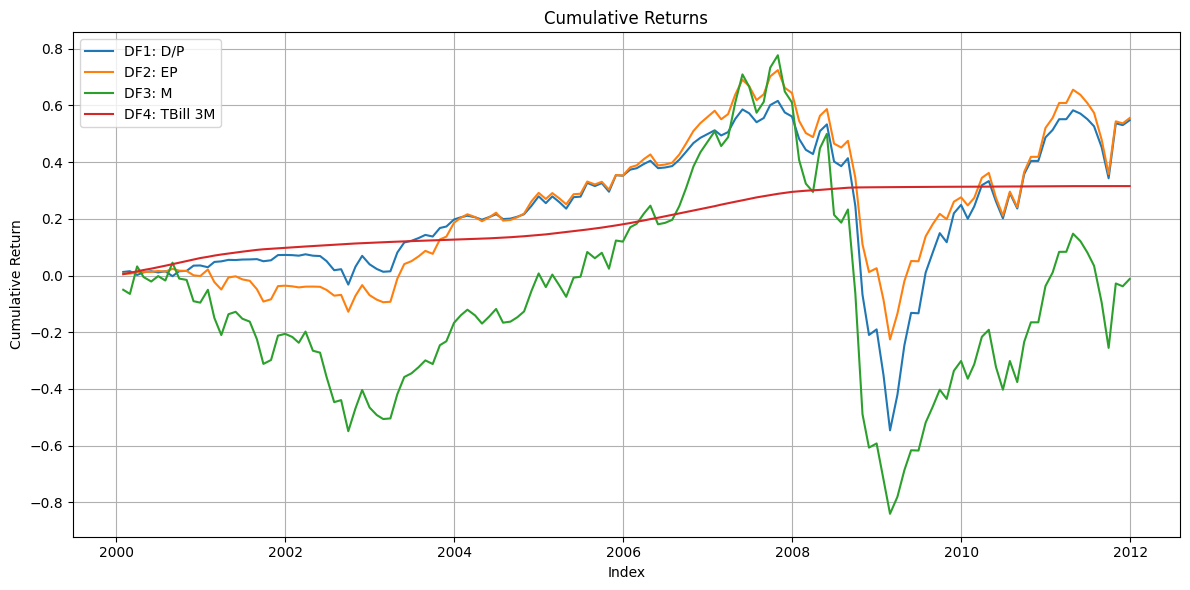

,DF1: D/P,DF2: EP,DF3: M,DF4: TBill 3M
Mean,0.0051,0.0040,0.0070,0.0019
Volatility,0.0634,0.0433,0.1157,0.0017
Sharpe Ratio,0.0802,0.0928,0.0606,1.1421
Minimum,-0.2986,-0.1747,-0.4547,-0.0000
Maximum,0.3000,0.1368,0.4257,0.0053
VaR (5%),-0.0537,-0.0644,-0.1743,0.0000


Underperform


In [55]:
dp_forecast_return.rename(columns = {'Forecasted Returns':'D/P'}, inplace = True)
ep_return_forecasted.rename(columns = {'Forecasted Returns':'EP'}, inplace = True)
multiple_forecast_return.rename(columns = {'Forecasted Returns':'M'}, inplace = True)
summary = plot_cumulative_returns(dp_forecast_return.loc['2000':'2011'], ep_return_forecasted.loc['2000':'2011'], multiple_forecast_return.loc['2000':'2011'], risk_free[['TBill 3M']].loc['2000':'2011'], return_stats=True)
display(pd.DataFrame(summary))
print('Underperform')

    

In [53]:
neg_risk_premium = total_strategy_df.loc[:,['Negative Risk Premium Months','Total Months']]
neg_risk_premium['Negative Risk Premium Months (%)'] = neg_risk_premium['Negative Risk Premium Months'] *100/ neg_risk_premium['Total Months']
neg_risk_premium

,Negative Risk Premium Months,Total Months,Negative Risk Premium Months (%)
DP,142,334,42.5150
EP,138,334,41.3174
DP-EP-US3M,122,334,36.5269


# 4 Out-of-Sample Forecasting

This section utilizes data from the file, `gmo_data.xlsx`. We will reconsider the previous problem of estimating Equation (1) for \( x \). The reported \( R^2 \) was the in-sample \( R^2 \), which examined how well the forecasts fit within the sample from which the parameters were estimated.

In particular, we will focus on the case of using both the dividend-price and earnings-price ratios as signals. Let’s now consider the out-of-sample \( R^2 \). To do so, we need to follow these steps:

- **Start at \( t = 60 \)**.
- **Estimate Equation (1) only using data through time \( t \)**.
- Use the estimated parameters of Equation (1), along with \( x_{t+1} \), to calculate the out-of-sample forecast for the following period, \( t + 1 \).
- Calculate the \( t + 1 \) forecast error, \( e_{t+1}^{\text{forecast}} \).
- Move to \( t = 61 \), and repeat the process through the remainder of the sample.

You now have a time series of out-of-sample prediction errors, \( e_x \).

Calculate the time series of out-of-sample prediction errors \( e_{\text{null}} \), which are based on the null forecast:

1. Report the out-of-sample \( R^2 \):

   $$ \hat{r}^{\text{SPY}}_{t+1} = \hat{\alpha} + (\hat{\beta}) x_{t} $$

   $$ e_{t+1}^{\text{forecast}} = r_{t+1}^{\text{SPY}} - \hat{r}_{t+1}^{\text{SPY}} $$

   $$ \bar{r}^{\text{SPY}} = \frac{1}{T} \sum_{i=1}^T r_{i}^{\text{SPY}} $$

   $$ e_{t+1}^{\text{null}} = r_{t+1}^{\text{SPY}} - \bar{r}^{\text{SPY}} $$

   $$ R^2_{\text{OOS}} \equiv 1 - \frac{\sum_{i=61}^T \left(e_i^{\text{forecast}}\right)^2}{\sum_{i=61}^T \left(e_i^{\text{null}}\right)^2} $$

   Note that, unlike an in-sample \( R^2 \), the out-of-sample \( R^2 \) can be anywhere between \((-∞, 1]\). Did this forecasting strategy produce a positive out-of-sample \( R^2 \)?

2. **Re-do Problem 3.2 using this out-of-sample (OOS) forecast.**  
   How much better/worse is the OOS strategy compared to the in-sample version of Problem 3.2?

3. **Re-do Problem 3.3 using this OOS forecast.**  
   Is the point-in-time version of the strategy riskier?

<span style="color:red">
This strategy has negative r^2 meaning poor model performance. This is worse than predicting the mean for all data point
<span>

In [98]:
from statsmodels.regression.rolling import RollingOLS
t = 60

factor_1 = signals[['SPX DVD YLD']].shift(1)
reg_rolling = OOS_r2(spy, factor_1,t)
OOS_r2_dp = reg_rolling[0]
OOS_r2_dp = pd.DataFrame([[OOS_r2_dp]], columns = ['OOS R-Squared'], index = ['DP'])

factor_2 = signals[['SPX P/E']].shift(1)
reg_rolling = OOS_r2(spy, factor_1,t)
OOS_r2_ep = reg_rolling[0]
OOS_r2_ep = pd.DataFrame([[OOS_r2_ep]], columns = ['OOS R-Squared'], index = ['EP'])


factors = signals[['SPX DVD YLD', 'SPX P/E']].shift(1)
reg_rolling  = OOS_r2(spy, factors, t)
OOS_r2_epdp  = reg_rolling[0]
OOS_r2_epdp = pd.DataFrame([[OOS_r2_epdp]], columns = ['OOS R-Squared'], index = ['DP-EP'])


factors_tnote= signals[['TNote 10YR']]
reg_rolling  = OOS_r2(spy, factors_tnote, t)
OOS_r2_tnote  = reg_rolling[0]
OOS_r2_tnote = pd.DataFrame([[OOS_r2_tnote]], columns = ['OOS R-Squared'], index = ['TNote 10YR'])
oos_r2_sum = pd.concat([OOS_r2_dp,OOS_r2_ep,OOS_r2_epdp,OOS_r2_tnote])
oos_r2_sum

,OOS R-Squared
DP,-0.0396
EP,-0.0396
DP-EP,-0.0577
TNote 10YR,-0.0098


In [99]:
#2

In [103]:
factor = signals.loc[:, 'SPX P/E'].shift(1).to_frame()
fund_ret = excess_returns.loc[factor.index[0]:, ['SPY']]
reg_ep = OOS_r2(fund_ret, factor,60)
oos_s_r_squared_pe = reg_ep[0]
OOS_r2_ep = pd.DataFrame([[oos_s_r_squared_pe]], columns = ['OOS R-Squared'], index = ['EP'])
reg_ep_params = reg_ep[1]

In [115]:
factor = signals.loc[:,'SPX P/E'].shift(1).to_frame()
fund_ret= excess_returns.loc[factor.index[0]:,['SPY']]
OOS_EP_predict = OOS_strat(fund_ret,factor, 60, 100).rename(columns={'Strat Returns':'EP_OOS_Returns'})

factor = signals.loc[:,'SPX DVD YLD'].shift(1).to_frame()
fund_ret= excess_returns.loc[factor.index[0]:,['SPY']]
OOS_DP_predict = OOS_strat(fund_ret,factor, 60, 100).rename(columns={'Strat Returns':'DP_OOS_Returns'})

factor = signals.loc[:,['SPX DVD YLD','SPX P/E']].shift(1)
fund_ret= excess_returns.loc[factor.index[0]:,['SPY']]
OOS_EPDP_predict = OOS_strat(fund_ret,factor, 60, 100).rename(columns={'Strat Returns':'DP-EP_OOS_Returns'})


factor = signals.loc[:,['SPX DVD YLD','SPX P/E','TNote 10YR']].shift(1)
fund_ret= excess_returns.loc[factor.index[0]:,['SPY']]
OOS_all_predict = OOS_strat(fund_ret,factor, 60, 100).rename(columns={'Strat Returns':'All_OOS_Returns'})





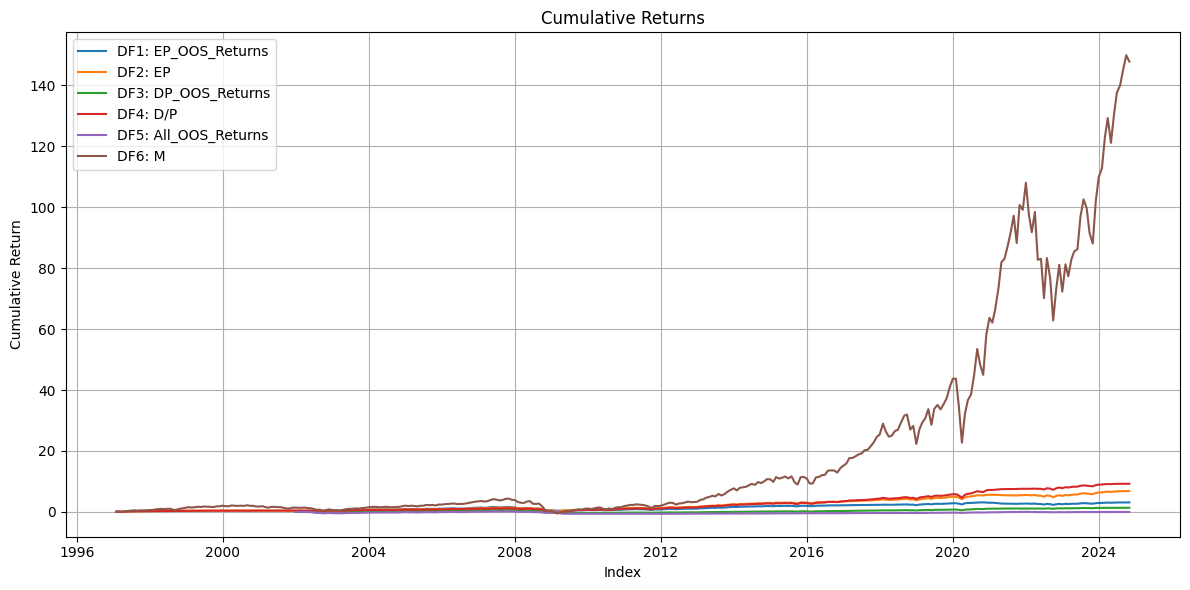

,DF1: EP_OOS_Returns,DF2: EP,DF3: DP_OOS_Returns,DF4: D/P,DF5: All_OOS_Returns,DF6: M
Mean,0.0059,0.0068,0.0044,0.0081,0.0019,0.0207
Volatility,0.0381,0.0356,0.0492,0.0478,0.0592,0.1034
Sharpe Ratio,0.1539,0.1914,0.0884,0.1704,0.0321,0.1997
Minimum,-0.1554,-0.1747,-0.2585,-0.2986,-0.5262,-0.4547
Maximum,0.1954,0.1368,0.2238,0.3000,0.3682,0.4257
VaR (5%),-0.0536,-0.0493,-0.0610,-0.0487,-0.0630,-0.1516


In [116]:
stats_plot = plot_cumulative_returns(OOS_EP_predict, ep_return_forecasted, OOS_DP_predict, dp_forecast_return, OOS_all_predict, multiple_forecast_return,  return_stats=True)
display(pd.DataFrame(stats_plot))

In [106]:
#4.3

In [117]:
oos_prediction_sum = pd.concat([OOS_DP_predict.T,OOS_EP_predict.T,OOS_all_predict.T])
oos_prediction_sum = oos_prediction_sum.T

strategy = {'DP': OOS_DP_predict.dropna(),
          'EP': OOS_EP_predict.dropna(),
            'DP-EP' : OOS_EPDP_predict,
          'All': OOS_all_predict.dropna()
         }
factor = excess_returns.loc[:,['SPY']]
total_strategy_summary = []

for key,value in strategy.items():
    strat = strategy[key]
    strat_summary = performance_summary(strat)
    strat_summary.index = [key]
    strat_summary['Negative Risk Premium Months'] = len(strat[strat[key + '_OOS_Returns'] - risk_free['TBill 3M'] <0])
    strat_summary['Total Months'] = len(strat)
    ts = time_series_regression(strat, factor[strat.index[0]:].squeeze(), False)
    strat_summary['Market Beta'] = ts['SPY beta'].values
    strat_summary['Market Alpha'] = ts['alpha_hat'].values
    strat_summary['Market Information Ratio'] = ts['info_ratio'].values
    
    total_strategy_summary.append(strat_summary)
    
total_strategy_df = pd.concat(total_strategy_summary)
  
total_strategy_df.loc[:,['Mean','Volatility','Sharpe Ratio','Max Drawdown','Market Beta','Market Alpha','Market Information Ratio']]

,Mean,Volatility,Sharpe Ratio,Max Drawdown,Market Beta,Market Alpha,Market Information Ratio
DP,0.0522,0.1705,0.3062,-0.6560,0.7375,-0.0103,-0.0791
EP,0.0703,0.1319,0.5333,-0.4763,0.7032,0.0107,0.1346
DP-EP,0.0467,0.2147,0.2175,-0.7163,0.5372,0.0012,0.0058
All,0.0228,0.2051,0.1113,-0.6906,0.4389,-0.0144,-0.0740


In [118]:
neg_risk_premium = total_strategy_df.loc[:,['Negative Risk Premium Months','Total Months']]
neg_risk_premium['Negative Risk Premium Months (%)'] = neg_risk_premium['Negative Risk Premium Months'] *100/ neg_risk_premium['Total Months']
neg_risk_premium

,Negative Risk Premium Months,Total Months,Negative Risk Premium Months (%)
DP,110,275,40.0000
EP,115,275,41.8182
DP-EP,111,275,40.3636
All,112,275,40.7273


In [ ]:
echo "# pmt" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Kunj121/pmt.git
git push -u origin main